In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('paper.png')

In [4]:
if img is None:
    print("Error: Image not loaded.")
else:
    # Split the image into its BGR components
    B, G, R = cv2.split(img)
    print("Image array sample:\n", img[50:200, 50:200, :])


    # Display the original image and the individual color channels
    plt.figure(figsize=(10, 10))

Image array sample:
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [144 124 191]
  [255 255 212]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [144 124 191]
  [255 255 212]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [144 124 191]
  [255 255 212]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


<Figure size 1000x1000 with 0 Axes>

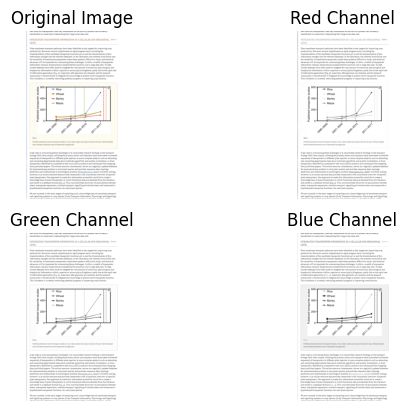

In [5]:
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(R, cmap='gray')
    plt.title('Red Channel')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(G, cmap='gray')
    plt.title('Green Channel')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(B, cmap='gray')
    plt.title('Blue Channel')
    plt.axis('off')

    plt.show()

In [6]:
color_matrix = np.stack((B, G, R), axis=-1)


In [7]:
print("Color Matrix shape:", color_matrix.shape)

Color Matrix shape: (1027, 667, 3)


In [8]:
print("Color Matrix sample:\n", color_matrix[0:5, 0:5, :])


Color Matrix sample:
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [9]:
# Convert to grayscale
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# thresholding
ret, thresh = cv2.threshold(imgray, 250, 255, 0)
print(thresh)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


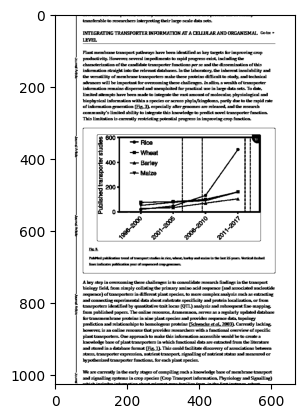

In [10]:

plt.imshow(thresh, cmap='gray')
plt.show()

In [13]:

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [14]:
img_height, img_width = imgray.shape

# Function to filter contours based on size and aspect ratio
def is_valid_contour(contour):
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h
    # Filter based on width and height constraints and aspect ratio
    return (0.1 * img_width < w < 0.9 * img_width) and (0.1 * img_height < h < 0.9 * img_height) and (0.5 < aspect_ratio < 2.0)

# Filter contours
valid_contours = [contour for contour in contours if is_valid_contour(contour)]

# Sort valid contours by area (largest to smallest)
valid_contours = sorted(valid_contours, key=cv2.contourArea, reverse=True)

# Print all valid contours
for i, contour in enumerate(valid_contours):
    print(f"Contour {i}:")
    print(contour)

# draw and display all valid contours on the original image
im_with_contours = img.copy()
cv2.drawContours(im_with_contours, valid_contours, -1, (0, 255, 0), 3)


Contour 0:
[[[ 78 315]]

 [[608 315]]

 [[610 317]]

 [[610 718]]

 [[608 720]]

 [[ 78 720]]

 [[ 76 718]]

 [[ 76 317]]]
Contour 1:
[[[ 80 317]]

 [[ 78 319]]

 [[ 78 716]]

 [[ 80 718]]

 [[606 718]]

 [[608 716]]

 [[608 319]]

 [[606 317]]]
Contour 2:
[[[118 333]]

 [[567 333]]

 [[570 336]]

 [[570 628]]

 [[567 631]]

 [[118 631]]

 [[115 628]]

 [[115 336]]]
Contour 3:
[[[180 345]]

 [[180 546]]

 [[234 546]]

 ...

 [[352 355]]

 [[350 353]]

 [[350 345]]]
Contour 4:
[[[119 335]]

 [[117 337]]

 [[117 627]]

 [[119 629]]

 [[566 629]]

 [[568 627]]

 [[568 551]]

 [[567 552]]

 [[508 552]]

 [[508 554]]

 [[507 555]]

 [[504 555]]

 [[503 554]]

 [[503 552]]

 [[419 552]]

 [[419 554]]

 [[418 555]]

 [[414 555]]

 [[413 554]]

 [[413 552]]

 [[331 552]]

 [[330 551]]

 [[329 552]]

 [[329 554]]

 [[328 555]]

 [[325 555]]

 [[324 554]]

 [[324 552]]

 [[240 552]]

 [[240 554]]

 [[239 555]]

 [[235 555]]

 [[234 554]]

 [[234 551]]

 [[233 552]]

 [[206 552]]

 [[205 551]]

 

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [15]:
# valid_contours = [contour for contour in contours if is_valid_contour(contour)]

# # Sort valid contours by area (largest to smallest)
# valid_contours = sorted(valid_contours, key=cv2.contourArea, reverse=True)

# # Print all valid contours and their images
# for i, contour in enumerate(valid_contours):
#     print(f"Contour {i}:")
#     print(contour)

# Get bounding rectangle for the contour
x, y, w, h = cv2.boundingRect(contour)

# Extract the region of interest (ROI) from the original image
roi = img[y:y+h, x:x+w]

# Show the ROI image(prints the figure in a contour box)
cv2.imwrite('C:\\contoured_boxes_' + str(i) + '.jpg', roi)


True

In [16]:
for i, contour in enumerate(contours):
    print(f"Contour {i}:")
    print(contour)

# create a blank image and draw the contours for visualization
blank_image = np.zeros_like(img)
cv2.drawContours(blank_image, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Save the image with the contoured boxes
cv2.imwrite('C:\\contoured_boxes.jpg', blank_image)

Streaming output truncated to the last 5000 lines.

 [[183 105]]

 [[184 104]]

 [[189 104]]

 [[190 105]]

 [[191 105]]

 [[192 104]]

 [[202 104]]

 [[203 105]]

 [[204 105]]

 [[205 104]]

 [[209 104]]

 [[211 106]]

 [[211 109]]

 [[209 111]]

 [[205 111]]

 [[204 110]]

 [[203 110]]

 [[202 111]]

 [[200 111]]

 [[200 112]]

 [[201 113]]

 [[200 114]]

 [[197 114]]

 [[196 113]]

 [[197 112]]

 [[197 106]]

 [[196 107]]

 [[195 107]]

 [[194 106]]

 [[195 107]]

 [[196 107]]

 [[197 108]]

 [[197 109]]

 [[195 111]]

 [[178 111]]

 [[177 110]]

 [[177 109]]

 [[179 107]]

 [[180 107]]

 [[176 107]]

 [[176 109]]

 [[177 110]]

 [[176 111]]

 [[170 111]]

 [[168 109]]

 [[168 104]]]
Contour 3166:
[[[180 109]]]
Contour 3167:
[[[200 107]]

 [[200 109]]

 [[201 108]]

 [[201 107]]]
Contour 3168:
[[[191 107]]

 [[191 108]]

 [[192 108]]

 [[193 109]]

 [[194 109]]

 [[193 108]]

 [[192 108]]]
Contour 3169:
[[[187 107]]

 [[187 109]]]
Contour 3170:
[[[207 106]]

 [[207 109]]

 [[208 108

True

In [17]:
# Find the largest contour assuming it's the rectangle around the graph
largest_contour = max(contours, key=cv2.contourArea)

# Get the bounding rectangle coordinates of the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Print the coordinates of the bounding rectangle
print(f"Rectangle Coordinates: x={x}, y={y}, width={w}, height={h}")

# Extract the region of interest (ROI) from the original image
roi = thresh[y:y+h, x:x+w]

# Save the extracted region
cv2.imwrite('C:\\extracted_graph.jpg', roi)

Rectangle Coordinates: x=0, y=0, width=667, height=1027


True